<div style="text-align: center;">


##  Fertility Decline in Unstable Times 
### A Data-Driven Analysis of how Economic and Social Influences affects Birth Rates in Europe

##### Introduction to coding and data management part 2
##### Andrea Graziano Gitto
</div>

### `Introduction`
In recent years, the world has undergone a series of critical events that have reshaped the global geopolitical landscape. More significantly, these events have altered the way people perceive reality. Personally, I have felt a growing sense of uncertainty about the future and the promises that were once assumed in a stable world. The pace of change appears so rapid that younger generations struggle to adapt.

This personal sense of unease led me to question whether this sentiment is shared by others. To explore this, I sought an objective indicator that could reflect a widespread perception of future uncertainty. I hypothesized that declining birth rates in Europe might be partially explained by this atmosphere of unpredictability, families might choose not to take on the responsibility of raising children in a volatile and risky global context.

---

### `Research Questions`

To uncover meaningful patterns in this context, the study is guided by the following research questions:

- Does economic development play a role in declining fertility rates?
- Have periods of economic crisis affected fertility rates?
- What other factors might help explain the decline in birth rates?

---

### `Relevant Literature` 
Before diving into the analysis, I considered it essential to consult existing research on global fertility trends. While these studies do not answer my specific question directly, they provided important insights that helped guide the direction of my work.

- https://ourworldindata.org/global-decline-fertility-rate

---

### `Datasets Used`

- **Fertility Rate**  
  Source: World Bank – Fertility Rate (Births per Woman)  
  https://data.worldbank.org/indicator/SP.DYN.TFRT.IN

- **GDP (Gross Domestic Product)**  
  Source: World Bank – GDP (Current US$)  
  https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

- **Unemployment Rate**  
  Source: Our World in Data – Unemployment Rate (IMF estimates)  
  https://ourworldindata.org/grapher/unemployment-rate-imf?time=earliest..2029

- **Female Labour Force**  
  Source: World Bank – Labor force, female (% of total labor force)  
  https://data.worldbank.org/indicator/SL.TLF.TOTL.FE.ZS

- **Public Health Expenditure as a Share of GDP**  
  Source: Our World in Data – Public Health Spending  
  https://ourworldindata.org/grapher/public-health-expenditure-share-gdp

---

### `Project Overview`

This project presented several challenges due to the specificity of the research question and the limited availability of direct supporting evidence. Despite this, I approached the analysis methodically and maintained internal consistency throughout.

To make informed decisions at each stage, I frequently relied on data visualizations, even during preprocessing steps like cleaning and merging. These visual tools helped me identify the most appropriate path forward. 

The project is structured into the following main sections:

- Data Cleaning  
- Data Analysis  
- Data Reshaping and Merging  
- Data Visualization  
- Conclusions

---

### `Note on Methodology: Why Fertility Rate Was Used Instead of Childlessness Rate` 

Although this study was originally aimed at analyzing the childlessness rate related to the way people perceive reality and uncertainty, the proportion of women who remain childless during their reproductive years, it became evident during the research phase that this metric is inconsistently defined and poorly harmonized across European countries. Many nations do not track this figure directly, or do so using varying definitions and methodologies, making cross-country comparisons unreliable.

Due to the lack of aggregated and standardized datasets on childlessness, I chose instead to rely on the fertility rate (births per woman) as a proxy indicator. While it is influenced by all women, including those who have children, it inherently accounts for the share of childless women through its statistical construction. With appropriate caution and contextual understanding, the fertility rate provides a reliable and comprehensive metric for examining demographic trends across Europe.

---



### `Booting up the System`

#### Installing Libraries
##### Install only the necessary packages using `pip install` to ensure your environment has all the required libraries. If a library is already installed, `pip` will skip reinstalling it.

In [1]:
%pip install pandas scipy numpy matplotlib seaborn plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Importing built in Modules and Libraries


In [2]:
# Library for interacting with the operating system 
import os

# Library for data manipulation and analysis
import pandas as pd

# Library for scientific computing 
import scipy

# Library for numerical computations and handling arrays
import numpy as np

# Library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt
import plotly.express as px

# Library for statistical data visualization
import seaborn as sns

# Functions for calculating statistical correlations
from scipy.stats import pearsonr  # Pearson correlation coefficient
from scipy.stats import linregress  # Linear regression analysis


#### Functions
##### During the analysis, it was necessary to apply plots or transformations to the datasets, so I decided to summarize the most frequently used pieces of code into functions, which I could then call whenever needed.


#### Plot for Comparing Trends on the Same Scale.

This function plots normalized and base-year-shifted trends of selected variables over time.
It also annotates the true values from the original dataset at the base year and the final year.

Parameters:
- df (pd.DataFrame): DataFrame containing normalized and shifted values.
- variables (list): List of variable names to plot.
- original_df (pd.DataFrame): Original DataFrame to fetch true values for annotations.
- base_year (int, optional): Reference year for shifting values (default is 1980).
- title (str, optional): Title of the plot.
- palette (list or dict, optional): Color palette for the plot (default is Seaborn "tab10").

Notes:
- The selected variables are shifted so that their mean at the base year becomes zero.
- True values from the original dataset are annotated at the base year and at the year 2023.
- Vertical dashed lines mark significant historical events, with corresponding labels. 
1980, 1990, 2008, 2010, and 2020 mark significant events like the rise of birth control and HIV/AIDS, social campaigns, the subprime crisis, the EU debt crisis, and COVID-19. These events likely had an impact on trends like birth rates, unemployment, and GDP. Keeping track of them helps us understand any unusual shifts in the data. When we use this function later, I'll explain in more detail how these events may have influenced the datasets and what we can learn from them.



In [3]:
def plot_shifted_normalized_trends(df, variables, original_df, base_year=1980, title="Shifted Normalized Trends of Selected Variables", palette=None, ax=None):

    # If no axis is provided, use the current one (for standalone plots)
    if ax is None:
        _, ax = plt.subplots(figsize=(15, 8))
    else:
        ax.set_title(title)

    sns.set(style="whitegrid")

    # Copy the input DataFrame
    shifted_df = df.copy()
    
    # Shift variables relative to base year mean
    for var in variables:
        base_value = shifted_df.loc[shifted_df['Year'] == base_year, var].mean()
        shifted_df[var] = shifted_df[var] - base_value

    # Define color palette
    colors = palette if palette else sns.color_palette("tab10", len(variables))

    # Plot each variable
    for var, color in zip(variables, colors):
        sns.lineplot(data=shifted_df, x="Year", y=var, label=var, color=color, alpha=0.7, ax=ax)

    # Add annotations for base and end year
    offsets = [-0.3 + 0.2 * i for i in range(len(variables))]
    for i, (var, color, offset) in enumerate(zip(variables, colors, offsets)):
        try:
            value_base = original_df.loc[original_df['Year'] == base_year, var].mean()
            value_end = original_df.loc[original_df['Year'] == 2023, var].mean()
            
            formatted_value_base = f"{value_base:.2e}" if abs(value_base) > 9999 else f"{value_base:.2f}"
            formatted_value_end = f"{value_end:.2e}" if abs(value_end) > 9999 else f"{value_end:.2f}"
            
            ax.text(base_year, shifted_df.loc[shifted_df['Year'] == base_year, var].mean() + offset,
                    formatted_value_base, color=color, fontsize=9, ha='right')
            ax.text(2023, shifted_df.loc[shifted_df['Year'] == 2023, var].mean(),
                    formatted_value_end, color=color, fontsize=9, ha='left')
        except Exception as e:
            print(f"Error annotating variable {var}: {e}")
            continue

    # Add vertical lines for significant events
    significant_events = {
        1980: "Birth control & HIV/AIDS",
        1990: "Social campaigns",
        2008: "Subprime crisis",
        2010: "EU debt crisis",
        2020: "COVID-19"
    }

    for i, (year, description) in enumerate(significant_events.items()):
        ax.axvline(x=year, color='gray', linestyle='--', alpha=0.7)
        ylim = ax.get_ylim()
        ax.text(year, ylim[1] * (0.95 - i * 0.05), description, 
                rotation=0, ha='center', fontsize=8, alpha=0.7)

    # Add event legend
    legend_lines = [plt.Line2D([0], [0], color='gray', linestyle='--', alpha=0.7)]
    ax.legend(legend_lines + ax.get_lines(), ["Significant Events"] + variables, loc='upper right', fontsize=9)

    ax.set_ylabel("Shifted Normalized Values")
    ax.set_xlabel("Year")
    ax.grid(True)


#### Normalize Variables from Original Dataset
This function normalizes specified columns from the original dataset and writes them into the target dataset. It allows for flexible scaling of variables by applying a multiplier.

Parameters:

- original_df (pd.DataFrame): The DataFrame containing the original (non-normalized) data.
- target_df (pd.DataFrame): The DataFrame where normalized columns will be written (can be the same as original_df).
- variables (list): List of column names (strings) to normalize.
- multiplier (float, optional): Scale factor applied during normalization (default is 10).

Returns:

- pd.DataFrame: The updated target_df with the normalized columns added or replaced.

Notes:
- Each selected column is divided by its maximum value to scale it between 0 and 1, and then multiplied by the specified multiplier. This method is useful for comparing trends of variables that have different original magnitudes.

In [4]:
def normalize_columns(original_df, target_df, variables, multiplier=10):

    for variable in variables:
        if variable in original_df.columns:
            min_val = original_df[variable].min()
            max_val = original_df[variable].max()
            # Check if max_val and min_val are equal to avoid division by zero
            if max_val == min_val:
                max_val += 1  # Increment max_val slightly to avoid division by zero
            normalized_col = ((original_df[variable] - min_val) / (max_val - min_val)) * multiplier
            target_df[variable] = normalized_col
        else:
            print(f"Warning: '{variable}' not found in the original dataset.")
    return target_df


#### Setting up the folder directory and loading the dataset from the CSV file.
We start by importing four main datasets: Birth Rate, GDP, and Unemployment Rate.
Additionally, from the World Bank Birth Rate dataset documentation, a supplementary file is provided that contains detailed information about the countries analyzed.
This file will be useful to filter and focus the study only on European countries.

In [5]:

# Get the current working directory
current_directory = os.getcwd()
# Set it as the relative directory 
os.chdir(current_directory)

# Adjust pandas display options to wrap text and increase column width
pd.set_option('display.max_colwidth', None)  # Allow unlimited column width
pd.set_option('display.width', 1000)          # Increase the display width for better readability

# Load the datasets
df = pd.read_csv('BirthRateWorld.csv') # Birth rate data 
dfInfo = pd.read_csv('BirthRateFilter.csv')  # Birth rate dataset info (countries by code and region)
GDP = pd.read_csv('GDPWorld.csv') # GDP data
Unemployment = pd.read_csv('unemployment-rate-imf.csv') # Unemployment data



### `Data Cleaning`


#### Preview of the imported datasets:
We can immediately notice that the datasets have different structures, with columns bearing different names but containing the same type of data, some columns that are unnecessary for our research, and different pivot formats.

In [6]:
df.head(3)  # Display the first few rows of the DataFrame



,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820000,4.655000,4.471000,4.271000,4.059000,3.842000,...,1.972000,1.95300,1.839000,1.587000,1.486000,1.325000,1.180000,1.179000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.723226,6.742124,6.762343,6.778133,6.787821,6.799767,...,4.678619,4.61654,4.570828,4.526445,4.480001,4.412125,4.348564,4.281848,NaN,NaN
2,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.282000,7.284000,7.292000,7.302000,7.304000,7.305000,...,5.405000,5.26200,5.129000,5.002000,4.870000,4.750000,4.643000,4.523000,NaN,NaN


In [7]:
dfInfo.head(2)  # Display the first few rows of the DataFrame


,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in the North to the Cape of Good Hope in the South (https://www.worldbank.org/en/region/afr/eastern-and-southern-africa)",Africa Eastern and Southern,NaN


In [8]:
GDP.head(3)  # Display the first few rows of the DataFrame


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.481857e+09,2.929447e+09,3.279344e+09,3.648573e+09,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.421063e+10,2.496398e+10,2.707880e+10,3.177575e+10,3.028579e+10,3.381317e+10,...,8.982778e+11,8.289428e+11,9.729989e+11,1.012306e+12,1.009721e+12,9.333918e+11,1.085745e+12,1.191423e+12,1.245472e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426000e+10,1.449724e+10,1.723305e+10,NaN


In [9]:
Unemployment.head(3)  # Display the first few rows of the DataFrame

,Entity,Code,Year,Unemployment rate - Percent of total labor force - Observations,Unemployment rate - Percent of total labor force - Forecasts
0,Albania,ALB,1980,5.028,NaN
1,Albania,ALB,1981,4.224,NaN
2,Albania,ALB,1982,2.813,NaN


#### Filtering the datasets to retain only the Europe and Central Asia region.

In [10]:

# Filter df to include only rows with Country Code present in dfInfo where Region is "Europe & Central Asia"
europe_country_codes = dfInfo[dfInfo["Region"] == "Europe & Central Asia"]["Country Code"].tolist()
df = df[df["Country Code"].isin(europe_country_codes)]
GDP = GDP[GDP["Country Code"].isin(europe_country_codes)]
Unemployment = Unemployment[Unemployment["Code"].isin(europe_country_codes)]

# Cleaning the data by removing unnecessary columns
Unemployment = Unemployment.drop(columns=["Unemployment rate - Percent of total labor force - Forecasts"], errors="ignore")
GDP = GDP.drop(columns=["Unnamed: 68", "Indicator Name", "Country Code", "Indicator Code"], errors="ignore")
df = df.drop(columns=["Unnamed: 68", "Indicator Name", "Country Code", "Indicator Code"], errors="ignore")




#### Datasets details
The unemployment dataset has a different structure, with more rows and fewer columns, requiring standardization for compatibility with the other datasets. Each dataset also exhibits a varying number of missing values which will need to be addressed during preprocessing.

In [11]:
# Print the shape of each dataset
print("Shape of Birth Rate Dataset (df):", df.shape)
print("Shape of Unemployment Dataset:", Unemployment.shape)
print("Shape of GDP Dataset:", GDP.shape)

# Print the number of NaN values in each dataset
print("\nTotal NaN Count for Birth Rate Dataset (df):", df.isna().sum().sum())
print("Total NaN Count for Unemployment Dataset:", Unemployment.isna().sum().sum())
print("Total NaN Count for GDP Dataset:", GDP.isna().sum().sum())



Shape of Birth Rate Dataset (df): (58, 65)
Shape of Unemployment Dataset: (1978, 4)
Shape of GDP Dataset: (58, 65)

Total NaN Count for Birth Rate Dataset (df): 308
Total NaN Count for Unemployment Dataset: 293
Total NaN Count for GDP Dataset: 1084


#### Unemployment DataSet Reshaping
- Pivoting: The data is reshaped to have countries as rows and years as columns.
- Handling Missing Countries: Missing countries in the unemployment data (based on the GDP dataset) are filled with NaN values.
- Column Cleanup: Duplicate columns are removed, and columns after the year 2023 are discarded, as 2023 is the last year of observation in the other two datasets.
- Data Cleanup: Unnecessary rows like "Entity" and "Code" are removed, and the index is reset for easier analysis.


In [12]:
# Transpose the DataFrame to have years as columns and countries as rows
Unemployment = Unemployment.pivot(index="Entity", columns="Year", values="Unemployment rate - Percent of total labor force - Observations")

# Ensure the number of rows in Unemployment matches the number of unique Country Names in GDP
missing_countries = set(GDP['Country Name']) - set(Unemployment.index)
for country in missing_countries:
    Unemployment.loc[country] = [np.nan] * len(Unemployment.columns)

# Convert column names to strings
Unemployment.columns = Unemployment.columns.astype(str)

# Remove duplicate columns if any
Unemployment = Unemployment.loc[:, ~Unemployment.columns.duplicated()]

# Remove columns after the year 2023
Unemployment = Unemployment.loc[:, Unemployment.columns <= "2023"]

# Remove unnecessary rows
Unemployment = Unemployment.drop(index=["Entity", "Code"], errors="ignore")

# Reset the index to make it numeric and move the current index to a column named 'Country Name'
Unemployment.reset_index(inplace=True)
Unemployment.rename(columns={"Entity": "Country Name"}, inplace=True)




#### Visualizing Trends and Determining Appropriate Data Filling Strategies
Thanks to this graphical representation, it is evident that only a few countries, represented with different color trends, exhibit significant NaN values. Additionally, the graphs show that all three datasets follow a continuous trend, either increasing or decreasing, but without any anomalous patterns. Therefore, using the mean to fill in the missing values is not a valid option, and unfortunately, we cannot determine if the missing data includes anomalous peaks. To mitigate the impact on the statistical results as much as possible, I initially applied backfilling to preserve the chronological order. For any remaining gaps not covered by this method, I then applied forward filling. This approach was chosen because, as mentioned earlier, other filling methods were not entirely suitable.

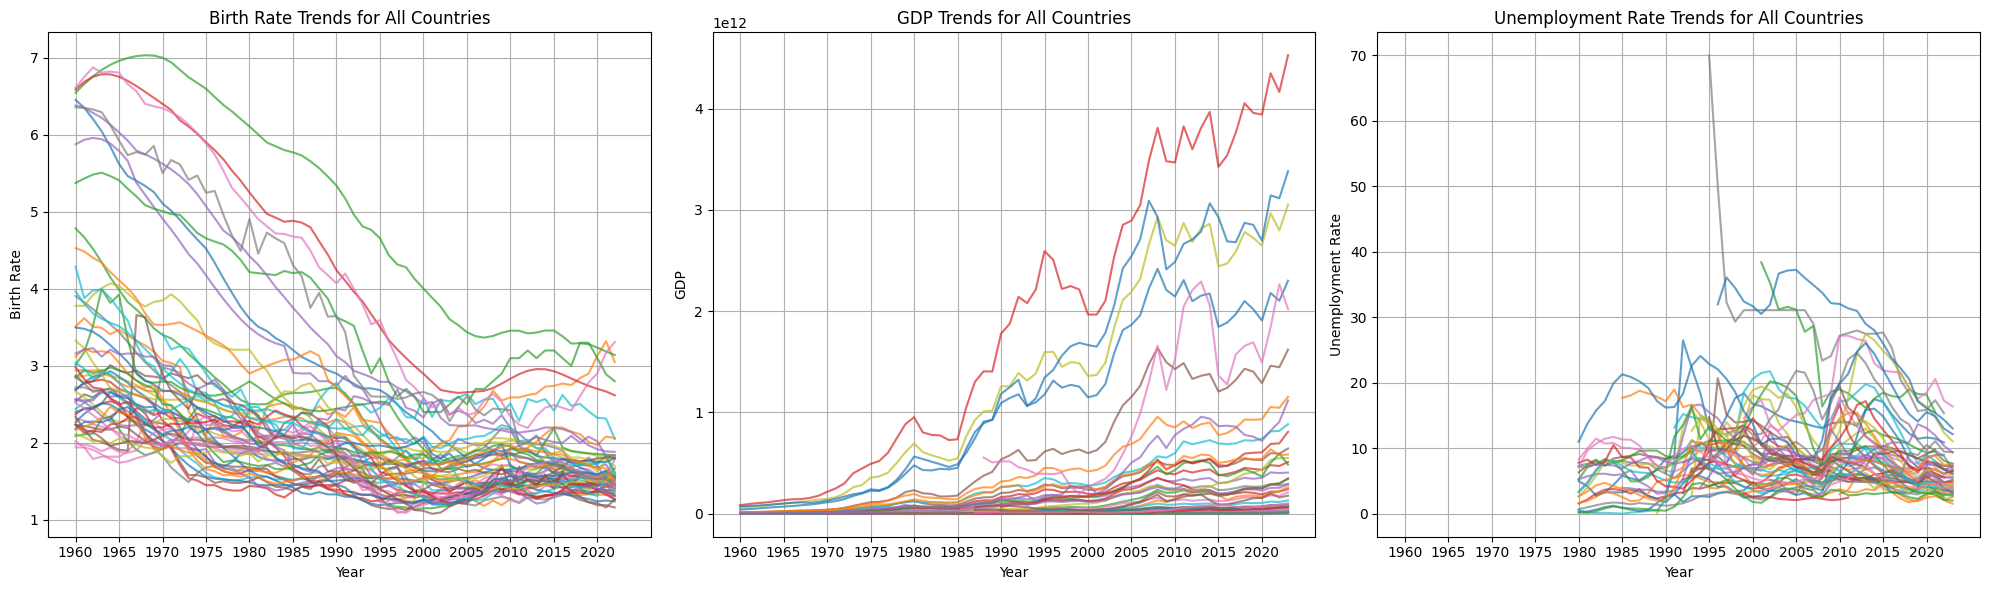

In [13]:
# Identify year columns (those that can be converted to integers)
year_columns = [col for col in df.columns if col != 'Country Name' and col.isdigit()]
years = list(map(int, year_columns))  # Convert to integers for plotting

# Create the figure
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharex=True)

# Plot Birth Rate
for country in df['Country Name'].unique():
    country_data = df[df['Country Name'] == country]
    values = country_data[year_columns].values.flatten()
    axes[0].plot(years, values, label=country, alpha=0.7)

axes[0].set_xlabel('Year')
axes[0].set_ylabel('Birth Rate')
axes[0].set_title('Birth Rate Trends for All Countries')
axes[0].grid(True)

# Repeat for GDP
year_columns_gdp = [col for col in GDP.columns if col != 'Country Name' and col.isdigit()]
years_gdp = list(map(int, year_columns_gdp))
for country in GDP['Country Name'].unique():
    country_data = GDP[GDP['Country Name'] == country]
    values = country_data[year_columns_gdp].values.flatten()
    axes[1].plot(years_gdp, values, label=country, alpha=0.7)

axes[1].set_xlabel('Year')
axes[1].set_ylabel('GDP')
axes[1].set_title('GDP Trends for All Countries')
axes[1].grid(True)

# Repeat for Unemployment
year_columns_unemp = [col for col in Unemployment.columns if col != 'Country Name' and col.isdigit()]
years_unemp = list(map(int, year_columns_unemp))
for country in Unemployment['Country Name'].unique():
    country_data = Unemployment[Unemployment['Country Name'] == country]
    values = country_data[year_columns_unemp].values.flatten()
    axes[2].plot(years_unemp, values, label=country, alpha=0.7)

axes[2].set_xlabel('Year')
axes[2].set_ylabel('Unemployment Rate')
axes[2].set_title('Unemployment Rate Trends for All Countries')
axes[2].grid(True)

# Set consistent x-axis ticks
axes[2].set_xticks(years[::5])
axes[2].set_xticklabels(years[::5], rotation=0)
plt.setp(axes, xticks=years[::5], xticklabels=years[::5])

plt.tight_layout()
plt.show()


### Handling Missing Values and Aligning Dataset Structures for Future Integration
- Column Removal: The years 1960-1979 are dropped from both the GDP and Birth Rate datasets to align with the Unemployment dataset starting in 1980.
- Common Countries: The datasets are filtered to retain only the countries that appear in all three datasets, ensuring consistency for future analysis.

In [14]:
# Remove columns from 1960 to 1979 in GDP and df
columns_to_remove = [str(year) for year in range(1960, 1980)]
GDP = GDP.drop(columns=columns_to_remove, errors="ignore")
df = df.drop(columns=columns_to_remove, errors="ignore")

# Calculate the intersection of countries present in all datasets
common_countries = set(df["Country Name"]) & set(GDP["Country Name"]) & set(Unemployment["Country Name"])

# Filter the datasets to include only the common countries
df = df[df["Country Name"].isin(common_countries)]
GDP = GDP[GDP["Country Name"].isin(common_countries)]
Unemployment = Unemployment[Unemployment["Country Name"].isin(common_countries)]




- The cleaning process begins by filling missing values in the Unemployment dataset using both backfill and forward fill methods. This ensures that any gaps in the data are filled with nearby valid values, either from the next or previous year, to maintain consistency in the dataset.

- Next, we check if the 1980 column exists in the dataset. If the column is missing, it could lead to errors when accessing data, so this step ensures that the code runs smoothly by only proceeding when the column is present.

- After ensuring the column exists, we identify invalid countries by checking for non-numeric values in the 1980 column, which should only contain numeric data. Countries with such invalid entries are flagged as problematic and need to be removed.

- Finally, these invalid countries are removed from all datasets. This step ensures that the datasets are consistent and only contain valid data, allowing for accurate comparisons and analysis across all variables.

In [15]:
# Apply backfill and forward fill to handle NaN values in the Unemployment dataset
Unemployment = Unemployment.apply(lambda row: row.bfill(axis=0).ffill(axis=0), axis=1)

# Check if the '1980' column exists before accessing it
if '1980' in Unemployment.columns:
    # Identify countries with invalid data in the '1980' column (e.g., strings instead of numeric values)
    invalid_countries = Unemployment[Unemployment['1980'].apply(lambda x: isinstance(x, str))]['Country Name'].tolist()
else:
    invalid_countries = []

# Remove the invalid countries from all datasets (Unemployment, GDP, and Birth Rate)
Unemployment = Unemployment[~Unemployment['Country Name'].isin(invalid_countries)]
GDP = GDP[~GDP['Country Name'].isin(invalid_countries)]
df = df[~df['Country Name'].isin(invalid_countries)]



The previous steps not only cleaned the Unemployment dataset but also reduced the need to address unusable data in the other datasets. By removing invalid countries and filling missing values in Unemployment, we effectively eliminated NaNs from it. As a result, the Unemployment dataset now has no missing values, ensuring it's clean and ready for analysis.

Additionally, this process helped reduce the NaN values in the GDP and Birth Rate datasets as well.

In [16]:
# Calculate total NaN values for each dataset
total_nan_df = df.isna().sum().sum()
total_nan_gdp = GDP.isna().sum().sum()
total_nan_unemployment = Unemployment.isna().sum().sum()

# Display the results
print("Total NaN Count for Birth Rate Dataset:", total_nan_df)
print("Total NaN Count for GDP Dataset:", total_nan_gdp)
print("Total NaN Count for Unemployment Dataset:", total_nan_unemployment)


Total NaN Count for Birth Rate Dataset: 124
Total NaN Count for GDP Dataset: 224
Total NaN Count for Unemployment Dataset: 0


Similar to unemployment data, for GDP, we do not need precise values, but rather approximate ones to capture the trends over time. Therefore, we apply backfilling and forward filling strategies in this case as well.

In [17]:
GDP = GDP.apply(lambda row: row.bfill(axis=0).ffill(axis=0), axis=1)

The birth rate, however, is the primary data for this process. While we are unfortunately forced to approximate values using the techniques previously mentioned, as they are the only suitable options, it is essential to account for any outliers that may lead to overly rough approximations. These outliers should be removed from the datasets to ensure accuracy.

The following code is designed to identify rows in the dataset with missing values and check if those missing values are preceded by another NaN value. By detecting these patterns, the code allows us to identify potential outliers or anomalies that should be addressed. It also extracts the values before and after the missing data, helping us understand trends and make informed decisions about applying backfilling and forward filling techniques to fill in the gaps or, if necessary, remove problematic columns.

In [18]:
# Initialize the dictionary to store results
nan_preceded_by_nan = {}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Get the years where NaN values are present
    nan_years = row[row.isna()].index.tolist()
    preceded_years = []
    value_before_after = {}
    
    # Check if the NaN value is preceded by another NaN value
    for year in nan_years:
        if str(year).isdigit():  # Ensure the column is a year
            prev_year = str(int(year) - 1)
            next_year = str(int(year) + 1)
            if prev_year in df.columns and pd.isna(row[prev_year]):
                preceded_years.append(year)
            
            # Add the value of the previous and next year if they exist
            value_before = row[prev_year] if prev_year in df.columns else None
            value_after = row[next_year] if next_year in df.columns else None
            value_before_after[year] = {'value_before': value_before, 'value_after': value_after}
    
    # If there are preceded years, add them to the dictionary
    if preceded_years:
        nan_preceded_by_nan[row['Country Name']] = {
            'preceded_years': preceded_years,
            'value_before_after': value_before_after
        }

print(f"The dataset spans {df.shape[1]} years. We aim to drop countries with a number of NaN values that is too close to the total number of years.\n")

# Display the results
for country, data in nan_preceded_by_nan.items():
    print(f"Country: {country}")
    print(f"Years with NaN preceded by another NaN: {len(data['preceded_years'])}")
    for year, values in data['value_before_after'].items():
        if pd.notna(values['value_before']) or pd.notna(values['value_after']):
            print(f"  Year: {year}, Value Before: {values['value_before']}, Value After: {values['value_after']}")




The dataset spans 45 years. We aim to drop countries with a number of NaN values that is too close to the total number of years.

Country: Andorra
Years with NaN preceded by another NaN: 37
  Year: 2005, Value Before: nan, Value After: 1.24
  Year: 2011, Value Before: 1.27, Value After: nan
Country: San Marino
Years with NaN preceded by another NaN: 41
  Year: 2011, Value Before: nan, Value After: 1.26
  Year: 2013, Value Before: 1.26, Value After: nan


Countries such as Monaco, San Marino, and Andorra have significantly fewer data points than others. For most other countries, the time series exhibit substantial gaps in certain years. To standardize the series and prepare the data for further analysis, we have decided to exclude these countries and apply backfilling to fill the gaps in the missing data.

In [19]:
# Extend the list of countries to be excluded due to insufficient data
invalid_countries.extend(['San Marino', 'Monaco', 'Andorra'])

# Remove the invalid countries from the Unemployment dataset
Unemployment = Unemployment[~Unemployment['Country Name'].isin(invalid_countries)]

# Remove the invalid countries from the GDP dataset
GDP = GDP[~GDP['Country Name'].isin(invalid_countries)]

# Remove the invalid countries from the Birth Rate dataset
df = df[~df['Country Name'].isin(invalid_countries)]

# Apply backfilling (bfill) followed by forward filling (ffill) to fill missing values across all columns
df = df.apply(lambda row: row.bfill(axis=0).ffill(axis=0), axis=1)


#### Final Data Cleaning Review

In [20]:
# Print the shape of each dataset
print("Shape of Birth Rate Dataset (df):", df.shape)
print("Shape of Unemployment Dataset:", Unemployment.shape)
print("Shape of GDP Dataset:", GDP.shape)

# Print the number of NaN values in each dataset
print("\nTotal NaN Count for Birth Rate Dataset (df):", df.isna().sum().sum())
print("Total NaN Count for Unemployment Dataset:", Unemployment.isna().sum().sum())
print("Total NaN Count for GDP Dataset:", GDP.isna().sum().sum())


Shape of Birth Rate Dataset (df): (42, 45)
Shape of Unemployment Dataset: (42, 45)
Shape of GDP Dataset: (42, 45)

Total NaN Count for Birth Rate Dataset (df): 0
Total NaN Count for Unemployment Dataset: 0
Total NaN Count for GDP Dataset: 0


All datasets have been cleaned arbitrarily, meaning the cleaning process was carried out based on the best available methods at the time. Now, a potential merge of the datasets is possible. However, in the future, it may be necessary to revisit and modify the cleaning process.

The final dataset will include observations from 42 countries, covering a period of 45 years, from 1980 to 2023.

### `Merge`

The goal is to consolidate all the data into a single dataset to enable more effective visualizations and statistical comparisons. Previously, each dataset had years as columns and countries as rows. In the new merged dataset, each row represents a specific country-year pair, while the columns contain the corresponding values for birth rate, GDP, and unemployment rate.

In [21]:
# Reshape the birth rate DataFrame from wide to long format:
# 'Country Name' remains as identifier, columns become 'Year' and 'Birth Rate'
birth_rate_melted = df.melt(id_vars="Country Name", var_name="Year", value_name="Birth Rate")

# Reshape the GDP DataFrame in the same way: columns become 'Year' and 'GDP'
gdp_melted = GDP.melt(id_vars="Country Name", var_name="Year", value_name="GDP")

# Reshape the Unemployment DataFrame: columns become 'Year' and 'Unemployment Rate'
unemployment_melted = Unemployment.melt(id_vars="Country Name", var_name="Year", value_name="Unemployment Rate")

# Merge birth rate and GDP data on 'Country Name' and 'Year'
merged_df = birth_rate_melted.merge(gdp_melted, on=["Country Name", "Year"])

# Merge the result with the unemployment data
merged_df = merged_df.merge(unemployment_melted, on=["Country Name", "Year"])

# Convert 'Year' column to integer type
merged_df["Year"] = merged_df["Year"].astype(int)

# Convert 'Unemployment Rate' column to numeric (handle errors gracefully)
merged_df["Unemployment Rate"] = pd.to_numeric(merged_df["Unemployment Rate"], errors="coerce")

# Filter rows to include only years between 1980 and 2023
merged_df = merged_df[(merged_df["Year"] >= 1980) & (merged_df["Year"] <= 2023)]

# Assign final processed DataFrame
FinalDF = merged_df


Preview of the new merged dataset structure

In [22]:
FinalDF.head()  # Display the first few rows of the DataFrame

,Country Name,Year,Birth Rate,GDP,Unemployment Rate
0,Albania,1980,3.614,1.578102e+09,5.028
1,Armenia,1980,2.505,2.256863e+09,38.400
2,Austria,1980,1.650,8.173750e+10,1.600
3,Azerbaijan,1980,3.497,8.884848e+09,11.777
4,Belgium,1980,1.680,1.268293e+11,8.300


In [23]:
FinalDF.drop(columns=["Year"]).describe() # Display summary statistics for all columns except 'Year'

,Birth Rate,GDP,Unemployment Rate
count,1848.00000,1.848000e+03,1848.000000
mean,1.80642,3.099398e+11,9.900352
std,0.62629,6.489556e+11,9.095775
min,1.07800,4.446587e+08,0.025000
25%,1.45000,1.394478e+10,4.870250
50%,1.65000,5.572378e+10,7.517000
75%,1.93000,2.543986e+11,11.800000
max,6.11000,4.525704e+12,70.000000


###  Preliminary Findings

In [24]:
# Calculate the correlation between Birth Rate and GDP
correlation_birth_gdp, _ = pearsonr(FinalDF['Birth Rate'], FinalDF['GDP'])

# Calculate the correlation between Birth Rate and Unemployment Rate
correlation_birth_unemployment, _ = pearsonr(FinalDF['Birth Rate'], FinalDF['Unemployment Rate'])

# Print the results
print(f"Correlation between Birth Rate and GDP: {correlation_birth_gdp:.4f}")
print(f"Correlation between Birth Rate and Unemployment Rate: {correlation_birth_unemployment:.4f}")


Correlation between Birth Rate and GDP: -0.1659
Correlation between Birth Rate and Unemployment Rate: -0.0838


Both correlation coefficients are weak and negative, indicating that neither GDP nor the unemployment rate is a strong direct predictor of the birth rate. This suggests that economic indicators alone are insufficient to explain variations in birth rate. To gain deeper insights, it may be necessary to consider additional factors such as education levels, cultural norms, government policies, and access to healthcare.

We will continue visualizing the data to identify potential patterns and determine which additional datasets might expand the analysis. To improve visualization, it is important to normalize the data, as they differ in scale. Since the birth rate is our primary variable of interest and we’ve observed that the minimum value is 1.1 and the maximum is 6.1, I have chosen to normalize all the data on a scale from 0 to 10. The results will be stored in a copy of the dataset.

In [25]:

NormalizedDF = FinalDF.copy() # Create a copy of the original DataFrame for normalized data
normalize_columns(FinalDF, NormalizedDF, ["Birth Rate", "GDP", "Unemployment Rate"]) # Normalize the specified columns


,Country Name,Year,Birth Rate,GDP,Unemployment Rate
0,Albania,1980,5.039746,0.002505,0.714970
1,Armenia,1980,2.835851,0.004005,5.484101
2,Austria,1980,1.136725,0.179642,0.225080
3,Azerbaijan,1980,4.807234,0.018651,1.679457
4,Belgium,1980,1.196343,0.279287,1.182565
...,...,...,...,...,...
1843,Slovenia,2023,0.937997,0.151823,0.521615
1844,Sweden,2023,0.878378,1.291674,1.092104
1845,Tajikistan,2023,4.099762,0.025669,0.352554
1846,Ukraine,2023,0.371622,0.394038,1.401929


The `plot_shifted_normalized` function will be frequently used to efficiently compare the data by isolating only the variables of interest. Additionally, certain critical dates are highlighted to emphasize periods of crisis or significant social changes.

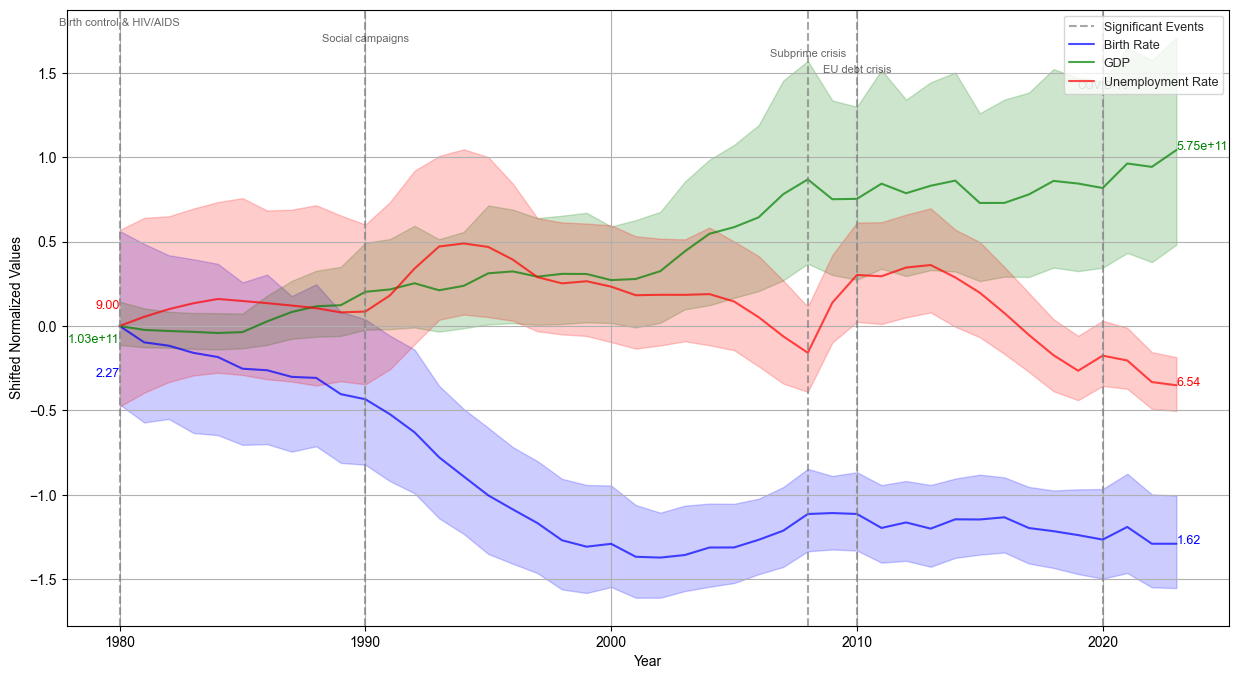

In [26]:
plot_shifted_normalized_trends(NormalizedDF, ['Birth Rate', 'GDP', 'Unemployment Rate'], FinalDF, base_year=1980, title="Shifted Normalized Trends of Birth Rate, GDP, and Unemployment Rate", palette=["blue", "green", "red"])

This graph visually highlights the negative correlation between the variables. However, it is important to remember that the correlation is weak and statistically insignificant, meaning it is not a conclusive indicator. Nevertheless, it suggests that we may be looking in the right direction. The highlighted dates correspond to years where all three variables showed a subsequent trend shift, whether it be a peak or a stabilization. This implies that the weak correlation might be due to the fact that these data are not the sole factors driving the observed changes.

To filter out sociocultural norms and other data not directly related to economic progress, instead of focusing on all the more than 40 countries in our study, we will now shift our attention to extreme cases. To identify these outliers, we will use the slope of the regression line, which indicates the strength of the phenomenon for each country.

In [27]:

# Create new columns for the slopes of birth rate, unemployment rate, and GDP
FinalDF['Slope Birth Rate'] = np.nan
FinalDF['Slope Unemployment Rate'] = np.nan
FinalDF['Slope GDP'] = np.nan

# Iterate over each country
for country in FinalDF['Country Name'].unique():
    # Filter the data for the current country and years from 1980 to 2023
    country_data = FinalDF[(FinalDF['Country Name'] == country) & (FinalDF['Year'] >= 1980) & (FinalDF['Year'] <= 2023)]
    
    # Ensure there are at least two years of data to calculate a slope
    if len(country_data) > 1:
        # Prepare the data for regression
        X = country_data['Year'].values  # Independent variable (Year)
        
        # Calculate the slope for Birth Rate
        y_birth_rate = country_data['Birth Rate'].values  # Dependent variable (Birth Rate)
        slope_birth_rate, _, _, _, _ = linregress(X, y_birth_rate)
        FinalDF.loc[FinalDF['Country Name'] == country, 'Slope Birth Rate'] = slope_birth_rate
        
        # Calculate the slope for Unemployment Rate
        y_unemployment_rate = country_data['Unemployment Rate'].values  # Dependent variable (Unemployment Rate)
        slope_unemployment_rate, _, _, _, _ = linregress(X, y_unemployment_rate)
        FinalDF.loc[FinalDF['Country Name'] == country, 'Slope Unemployment Rate'] = slope_unemployment_rate
        
        # Calculate the slope for GDP
        y_gdp = country_data['GDP'].values  # Dependent variable (GDP)
        slope_gdp, _, _, _, _ = linregress(X, y_gdp)
        FinalDF.loc[FinalDF['Country Name'] == country, 'Slope GDP'] = slope_gdp

# Display the updated DataFrame
FinalDF.head(3)  # Display the first few rows of the DataFrame with slopes


,Country Name,Year,Birth Rate,GDP,Unemployment Rate,Slope Birth Rate,Slope Unemployment Rate,Slope GDP
0,Albania,1980,3.614,1.578102e+09,5.028,-0.054141,0.177642,4.399764e+08
1,Armenia,1980,2.505,2.256863e+09,38.400,-0.031909,-0.687209,3.730860e+08
2,Austria,1980,1.650,8.173750e+10,1.600,-0.002368,0.077482,1.059065e+10



To better understand the relationship between birth rate decline and economic indicators, we examine which countries exhibit the most significant trends over time. 

Specifically, we calculate the slope of the regression line for each country from 1980 to 2023 for three variables: birth rate, GDP, and unemployment rate. By identifying the countries with the steepest **decline in birth rate** and the steepest **increase in GDP or unemployment**, we aim to isolate **extreme cases** that may reveal clearer patterns.

These countries can serve as case studies to explore whether economic progress or labor market dynamics could be linked to fertility trends. This selection allows us to focus on a smaller, more meaningful subset of the data instead of drawing broad conclusions across all 40+ countries, which may vary significantly in cultural and policy contexts.


In [28]:
# Identify countries with the highest/lowest slopes for each variable

# Get the 10 countries with the steepest decline in Birth Rate
lowest_birth_rate_countries = merged_df.drop_duplicates(subset='Country Name').nsmallest(10, 'Slope Birth Rate')['Country Name']

# Get the 10 countries with the steepest increase in GDP
highest_gdp_countries = merged_df.drop_duplicates(subset='Country Name').nlargest(10, 'Slope GDP')['Country Name']

# Get the 10 countries with the steepest increase in Unemployment Rate
highest_unemployment_countries = merged_df.drop_duplicates(subset='Country Name').nsmallest(10, 'Slope Unemployment Rate')['Country Name']

# Find countries that appear in all three sets
common_countries = set(lowest_birth_rate_countries) & set(highest_gdp_countries) & set(highest_unemployment_countries)

# Find countries that appear only in Birth Rate + GDP
only_gdp_countries = set(lowest_birth_rate_countries) & set(highest_gdp_countries)

# Find countries that appear only in Birth Rate + Unemployment Rate
only_unemployment_countries = set(lowest_birth_rate_countries) & set(highest_unemployment_countries)

# Combine all relevant countries into one list
selected_countries = list(only_gdp_countries) + list(only_unemployment_countries) + list(common_countries)

# Print the results
print("Countries with the steepest Birth Rate decline and top trends in all three variables:", common_countries)
print("Countries with the steepest Birth Rate decline and high GDP growth only:", only_gdp_countries)
print("Countries with the steepest Birth Rate decline and high Unemployment growth only:", only_unemployment_countries)




Countries with the steepest Birth Rate decline and top trends in all three variables: set()
Countries with the steepest Birth Rate decline and high GDP growth only: {'Poland'}
Countries with the steepest Birth Rate decline and high Unemployment growth only: {'Azerbaijan', 'Armenia', 'North Macedonia', 'Ireland'}


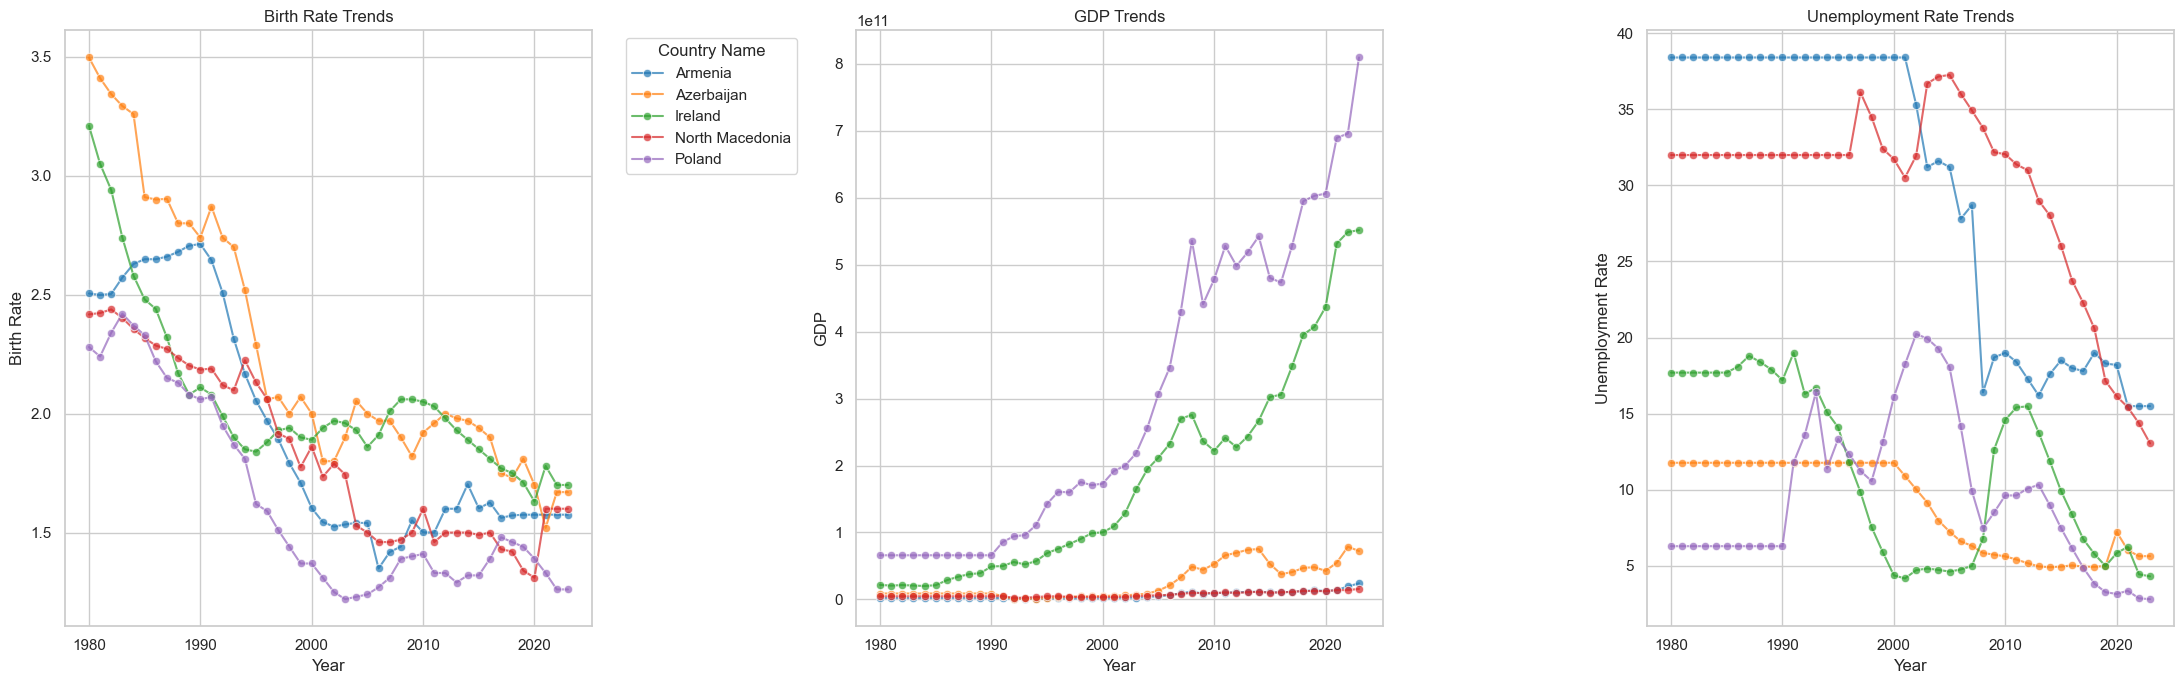

In [29]:

# Filter the dataset to include only the selected countries
filtered_data = FinalDF[FinalDF['Country Name'].isin(selected_countries)]

# Set the plot style
sns.set(style="whitegrid")

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(22, 7), sharex=True)

# Plot Birth Rate
sns.lineplot(ax=axes[0], data=filtered_data, x="Year", y="Birth Rate", hue="Country Name", marker="o", palette="tab10", alpha=0.7)
axes[0].set_title("Birth Rate Trends")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Birth Rate")
axes[0].grid(True)

# Plot GDP
sns.lineplot(ax=axes[1], data=filtered_data, x="Year", y="GDP", hue="Country Name", marker="o", palette="tab10", alpha=0.7, legend=False)
axes[1].set_title("GDP Trends")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("GDP")
axes[1].grid(True)

# Plot Unemployment Rate
sns.lineplot(ax=axes[2], data=filtered_data, x="Year", y="Unemployment Rate", hue="Country Name", marker="o", palette="tab10", alpha=0.7, legend=False)
axes[2].set_title("Unemployment Rate Trends")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Unemployment Rate")
axes[2].grid(True)

# Move legend outside the first plot
axes[0].legend(title="Country Name", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


### Conclusion from Initial Pattern Analysis

As a result of the previous analysis, we conclude that the selected variables, **GDP** and **unemployment rate**, are insufficient on their own to explain changes in birth rate. Although some weak correlations were observed, no consistent or meaningful patterns emerged, even when focusing on extreme cases.

To deepen the investigation, we now introduce two new variables that are more directly related to demographic dynamics while still reflecting elements of a country's economic development:

- **Female Labor Force Participation**: This indicator helps capture the role of women in the economy. Shifts in female employment patterns are often linked to changes in family planning, fertility choices, and gender roles,  all of which can impact birth rates.
  
- **Health Expenditure as a Share of GDP**: This indicator reflects a country's investment in its healthcare system and serves as a proxy for improvements in public health infrastructure. Higher health expenditure is often associated with lower infant mortality rates, which historically correlate with declining birth rates, as families no longer need to compensate for high child mortality. It may therefore provide economic insight into demographic shifts.

By adding these variables, we aim to identify whether these more socially-grounded factors can better account for the variations in birth rate observed across countries and over time.



### Extended Data Collection

In [30]:

# Drop all columns containing 'Slope' from FinalDF
FinalDF = FinalDF.drop(columns=[col for col in FinalDF.columns if 'Slope' in col], errors='ignore')

# Get the current working directory
current_directory = os.getcwd()

# Set the relative directory (optional, as it's already the current directory)
os.chdir(current_directory)

# Load the Female Labour Force dataset
FemaleLabour = pd.read_csv("FemaleLabourForce.csv")

# Filter FemaleLabour to include only countries present in FinalDF
final_countries = FinalDF['Country Name'].unique()
FemaleLabour = FemaleLabour[FemaleLabour['Country Name'].isin(final_countries)]

# Drop unnecessary columns from the FemaleLabour dataset
FemaleLabour = FemaleLabour.drop(columns=["Country Code", "Indicator Name", "Indicator Code"], errors="ignore")

# Filter columns to include only years from 1980 to 2023
columns_to_keep = [col for col in FemaleLabour.columns if col.isdigit() and 1980 <= int(col) <= 2023]
columns_to_keep.insert(0, 'Country Name')  # Keep the 'Country Name' column

# Update the DataFrame to include only the selected columns
FemaleLabour = FemaleLabour[columns_to_keep]

# Handle missing values using backfill and forward fill
FemaleLabour = FemaleLabour.apply(lambda row: row.bfill(axis=0).ffill(axis=0), axis=1)

# Melt the FemaleLabour DataFrame from wide to long format
female_labour_melted = FemaleLabour.melt(id_vars="Country Name", var_name="Year", value_name="Female Labour Force")

# Convert 'Year' column to integers and 'Female Labour Force' to floats
female_labour_melted['Year'] = female_labour_melted['Year'].astype(int)
female_labour_melted['Female Labour Force'] = female_labour_melted['Female Labour Force'].astype(float)

# Merge the melted FemaleLabour DataFrame with FinalDF on 'Country Name' and 'Year'
FinalDF = FinalDF.merge(female_labour_melted, on=["Country Name", "Year"], how="inner")

# Load the Health Expenditure dataset
Health_GDP = pd.read_csv("public-health-expenditure-share-gdp.csv")

# Filter Health_GDP to include only rows where 'Country Name' is in the 'FinalDF' dataset
Health_GDP = Health_GDP[Health_GDP['Entity'].isin(final_countries)]

# Drop unnecessary columns from the Health_GDP dataset
Health_GDP = Health_GDP.drop(columns=["Code"], errors="ignore")

# Filter rows to include only those with years between 1980 and 2023
Health_GDP = Health_GDP[(Health_GDP['Year'] >= 1980) & (Health_GDP['Year'] <= 2023)]

# Rename columns for consistency
Health_GDP.rename(columns={"Entity": "Country Name", "Public health expenditure as a share of GDP": "Health/GDP"}, inplace=True)


# Pivot the Health_GDP DataFrame to make 'Year' columns and 'Country Name' as rows
Health_GDP = Health_GDP.pivot(index="Country Name", columns="Year", values="Health/GDP")

# Handle missing values using backfill and forward fill
Health_GDP = Health_GDP.apply(lambda row: row.bfill(axis=0).ffill(axis=0), axis=1)

# Reset the index to ensure 'Country Name' is a column again
Health_GDP.reset_index(inplace=True)

# Melt the Health_GDP DataFrame to transform it from wide format to long format
Health_GDP = Health_GDP.melt(id_vars="Country Name", var_name="Year", value_name="Health/GDP")

# Convert the 'Year' column to integers for consistency
Health_GDP["Year"] = Health_GDP["Year"].astype(int)

# Merge the melted Health_GDP DataFrame with FinalDF on 'Country Name' and 'Year'
FinalDF = FinalDF.merge(Health_GDP, on=["Country Name", "Year"], how="left")

# Convert the 'Health/GDP' column to numeric type
FinalDF['Health/GDP'] = pd.to_numeric(FinalDF['Health/GDP'], errors='coerce')

# Perform backfill and forward-fill on the 'Health/GDP' column
FinalDF['Health/GDP'] = FinalDF['Health/GDP'].bfill().ffill()

# Display the first few rows of the merged DataFrame
FinalDF.head()


,Country Name,Year,Birth Rate,GDP,Unemployment Rate,Female Labour Force,Health/GDP
0,Albania,1980,3.614,1.578102e+09,5.028,41.132111,4.720
1,Armenia,1980,2.505,2.256863e+09,38.400,47.765173,4.720
2,Austria,1980,1.650,8.173750e+10,1.600,40.926401,4.720
3,Azerbaijan,1980,3.497,8.884848e+09,11.777,49.069621,5.665
4,Belgium,1980,1.680,1.268293e+11,8.300,39.030492,5.665


In [31]:
# Controlla se ci sono valori NaN nella colonna "Female Labour Force"
nan_count = FinalDF['Female Labour Force'].isna().sum()
nan_count2 = FinalDF['Health/GDP'].isna().sum()
# Stampa il risultato
print(f"Numero di valori NaN nella colonna 'Female Labour Force': {nan_count}, Health/GDP: {nan_count2}")

Numero di valori NaN nella colonna 'Female Labour Force': 0, Health/GDP: 0


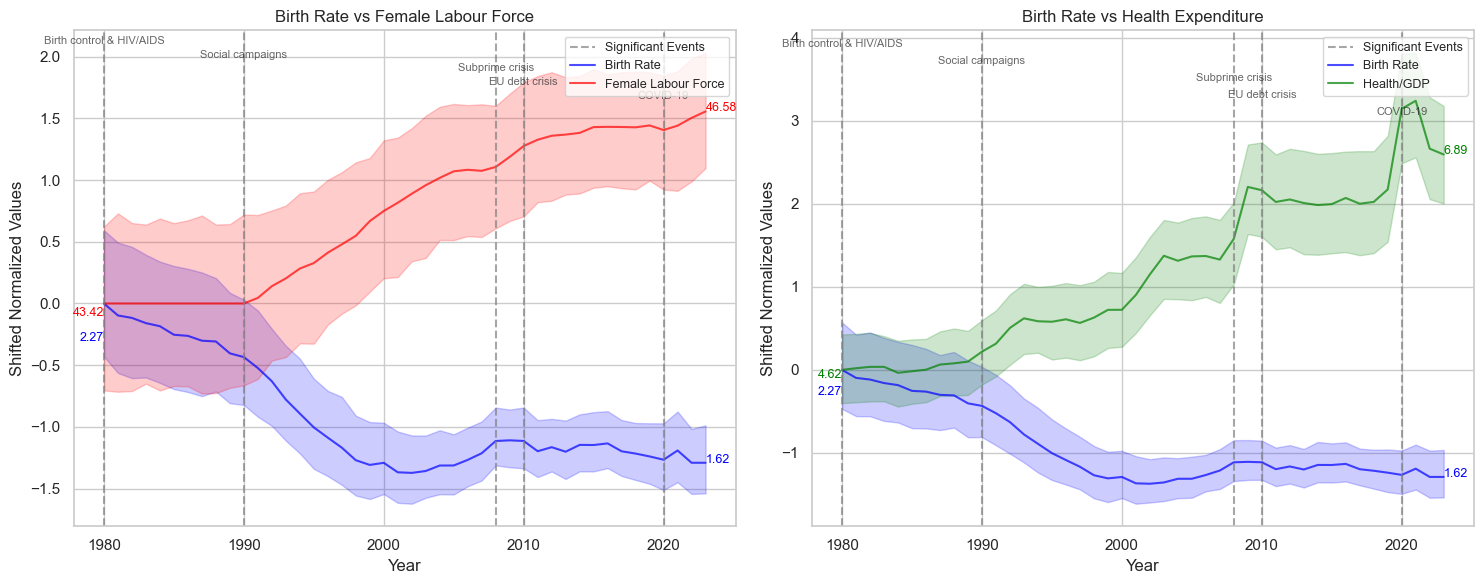

In [32]:
# Normalize relevant columns
normalize_columns(FinalDF, NormalizedDF, ["Female Labour Force"])
normalize_columns(FinalDF, NormalizedDF, ["Health/GDP"])

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot on the first axis
plot_shifted_normalized_trends(
    NormalizedDF, 
    ["Birth Rate", "Female Labour Force"], 
    FinalDF, 
    base_year=1980, 
    title="Birth Rate vs Female Labour Force", 
    palette=["blue", "red"], 
    ax=axes[0]
)

# Plot on the second axis
plot_shifted_normalized_trends(
    NormalizedDF, 
    ["Birth Rate", "Health/GDP"], 
    FinalDF, 
    base_year=1980, 
    title="Birth Rate vs Health Expenditure", 
    palette=["blue", "green"], 
    ax=axes[1]
)

# Adjust layout and show both
plt.tight_layout()
plt.show()


In [33]:

# Calcola la correlazione per Birth Rate e Feale Labour Force
correlation_birth_FemaleLabourForce, _ = pearsonr(FinalDF['Birth Rate'], FinalDF['Female Labour Force'])
correlation_birth_Health_GDP, _ = pearsonr(FinalDF['Birth Rate'], FinalDF['Health/GDP'])
# Stampa i risultati
print(f"Correlation between Birth Rate and Feale Labour Force: {correlation_birth_FemaleLabourForce:.4f}, \nCorrelation between Birth Rate and public-health-expenditure-share-gdp: {correlation_birth_Health_GDP:.4f}")


Correlation between Birth Rate and Feale Labour Force: -0.2419, 
Correlation between Birth Rate and public-health-expenditure-share-gdp: -0.2171


The correlation analysis reveals a weak negative relationship between birth rate and both female labor force participationand public health expenditure as a share of GDP. These findings align with theoretical expectations: as women’s involvement in the workforce increases and healthcare systems improve, particularly in maternal and infant care, fertility rates tend to decline. However, the relatively low magnitude of these correlations confirms that no single factor alone can account for the drop in birth rate. Rather, the data supports the hypothesis that this demographic trend is the result of cumulative and interconnected social, economic, and cultural transformations.


### `Data Visualization`


<div style="text-align: center;">

### Dynamic Map of Birth Rates in Europe Over Time

</div>

In [34]:


# Create a DataFrame for Birth Rate values by year and country
birth_rate_data = FinalDF.groupby(['Country Name', 'Year']).apply(
    lambda x: x['Birth Rate'].iloc[0]
).reset_index(name='Birth Rate')

# Create a choropleth map with a timeline
fig = px.choropleth(
    birth_rate_data,
    locations="Country Name",
    locationmode="country names",
    color="Birth Rate",
    hover_name="Country Name",
    animation_frame="Year",
    title="Birth Rate Over Time by Country",
    color_continuous_scale=px.colors.diverging.Temps,  # Use a diverging color scale for more contrast
    labels={"Birth Rate": "Birth Rate"}
)

# Update layout for better visualization and zoom on Europe
fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular',
        center={"lat": 54, "lon": 15},  # Center on Europe
        lataxis={"range": [45, 90]},    # Latitude range for Europe
        lonaxis={"range": [-25, 75]}   # Longitude range for Europe
    ),
    coloraxis_colorbar=dict(title="Birth Rate"),
)

# Show the plot
fig.show()

C:\Users\ggd3v\AppData\Local\Temp\ipykernel_14236\1283836086.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  birth_rate_data = FinalDF.groupby(['Country Name', 'Year']).apply(



<div style="text-align: center;">

This dynamic map of Europe provides an alternative and intuitive way to visualize the decline in birth rates over time

</div>


<div style="text-align: center;">

### Scatterplot Analysis
#### Birth Rate vs Public Health Expenditure, Colored by Female Labour Force Participation

</div>


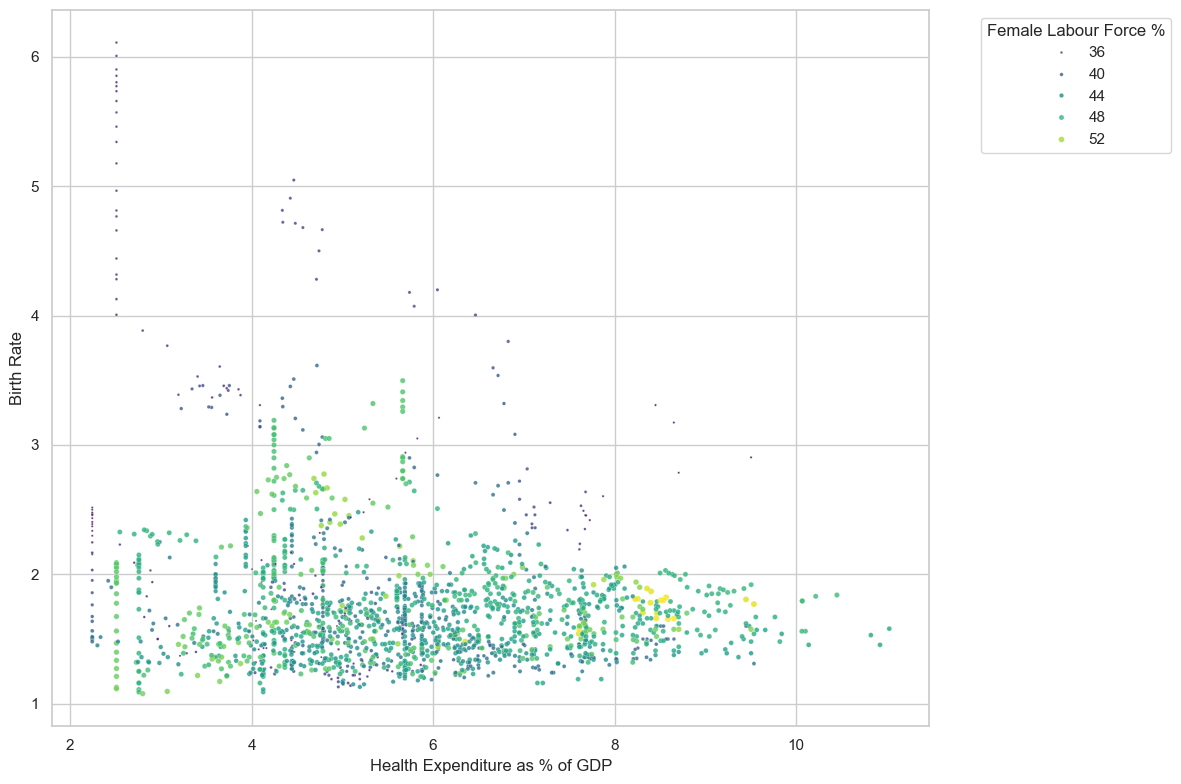

In [35]:
# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=FinalDF,
    x="Health/GDP",
    y="Birth Rate",
    hue="Female Labour Force",
    palette="viridis",
    size="Female Labour Force",
    sizes=(2, 20),
    alpha=0.8
)

# Add labels and title
scatter.set_title("", fontsize=16)
scatter.set_xlabel("Health Expenditure as % of GDP", fontsize=12)
scatter.set_ylabel("Birth Rate", fontsize=12)

# Add a legend
plt.legend(title="Female Labour Force %", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

This scatter plot shows a weak negative trend: countries with higher levels of public health spending (typically between 6% and 10% of GDP) tend to report lower birth rates, generally ranging from 1.2 to 2.0. In contrast, countries with lower health expenditures (2%–4%) show a much wider spread in birth rates, including some values exceeding 4 births per woman.

This pattern reflect the demographic transition theory, wherein improved healthcare lead to lower infant mortality rates. As child survival becomes more certain, families may choose to have fewer children.

Moreover, color patterns reveal that lower fertility often coincides with higher female labour force participation, while countries with high birth rates typically show lower female employment. This supports the well-established inverse relationship between women's workforce engagement and fertility levels.

<div style="text-align: center;">

### Scatterplot Analysis  
#### Birth Rate vs GDP, Colored by Female Labour Force Participation  

</div>

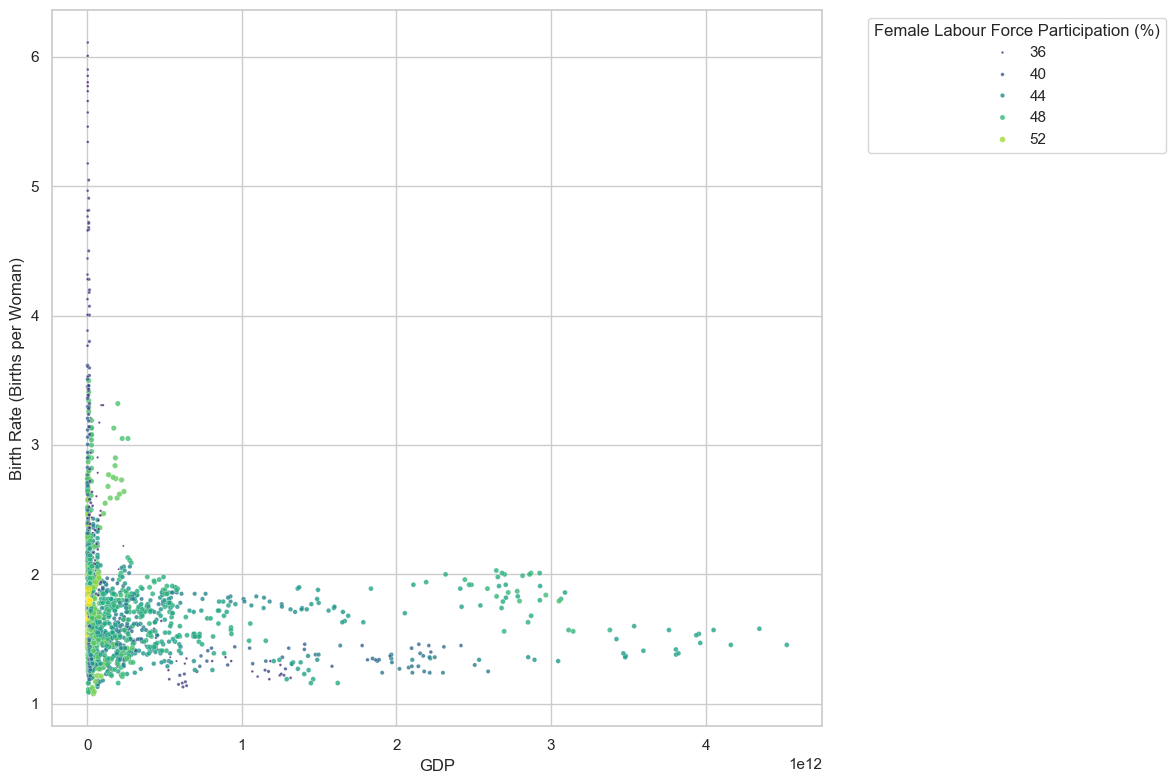

In [36]:
# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=FinalDF,
    x="GDP",
    y="Birth Rate",
    hue="Female Labour Force",
    palette="viridis",
    size="Female Labour Force",
    sizes=(2, 20),
    alpha=0.8
)

# Add labels and title
scatter.set_title("", fontsize=16)
scatter.set_xlabel("GDP", fontsize=12)
scatter.set_ylabel("Birth Rate (Births per Woman)", fontsize=12)

# Add a legend
plt.legend(title="Female Labour Force Participation (%)", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


This scatter plot indicates a clear trend: countries with lower GDP per capita often show higher birth rates. In particular, the top birth rate values are mostly found in the lowest GDP quartile. However, within this same economic group, there is also a presence of countries with very low birth rates. This divergence is captured by the color gradient, which reflects female labour force participation. In fact, among low-GDP countries, those with higher female workforce participation tend to exhibit lower birth rates. This pattern suggests a negative correlation between women's participation in the labor market and fertility, even in economically disadvantaged contexts.

### `Conclusion`
This study has examined the decline in European birth rates from 1980 to 2023 with the aim of identifying to what extent economic and social determinants have propelled this long-term population trend. The findings provide us evidence to answer the guiding research questions:

1. #### Does economic development play a role in declining fertility rates?
    The analysis reveals a weak negative correlation between economic development, measured through GDP per capita and fertility rates. This suggests that increased material prosperity does not necessarily stimulate higher birth rates. On the contrary, it may accompany a decline in fertility, potentially due to shifts in personal aspirations, family structures, and societal values that tend to emerge in more affluent contexts.

2. #### Have periods of economic crisis affected fertility rates?
    Economic downturns, identified through fluctuations in unemployment rates, do not show a consistent or statistically significant relationship with fertility trends. While certain crises temporally align with demographic changes, the lack of systematic patterns indicates that their influence on reproductive behavior is neither direct nor uniform across countries.

3. #### What other factors might help explain the decline in birth rates?
    Other variables, such as female labour force participation and public health expenditure as a share of GDP,also exhibit weak negative correlations with fertility. These findings align with established demographic theories suggesting that higher female employment and improved healthcare outcomes often coincide with delayed childbirth and a reduction in the average number of children per woman. Although the correlations are not strong, the direction of these associations is theoretically consistent.

In summary, no single economic indicator emerges as a dominant predictor of fertility decline. Rather, the evidence supports the interpretation that falling birth rates are the outcome of a complex interplay of structural, cultural, and individual transformations. These include changing gender roles, evolving expectations around family and career, and broader societal shifts regarding life priorities.

It is also important to acknowledge the limitations of a strictly quantitative approach. While statistical analysis enables the identification of trends and associations, it cannot fully capture the underlying motivations and existential dynamics that shape reproductive decisions. Qualitative insights and interdisciplinary perspectives, drawing from sociology, psychology, and cultural studies, are essential to complement and deepen this understanding.

Finally, the time frame under study (1980–2023) encompasses not only the aftermath of the oil crisis and the post-Cold War period, but also the dawn of the new millennium, a period marked by both uncertainty and optimism about the future. As such, it is plausible that many of the societal shifts underway will manifest their demographic consequences more clearly in the decades to come. Ongoing observation and future research will be crucial to discerning whether current patterns represent a transitional phase or a more enduring demographic realignment.